In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/film-genre-statistics/ThrowbackDataThursday Week 11 - Film Genre Stats.hyper
/kaggle/input/film-genre-statistics/ThrowbackDataThursday Week 11 - Film Genre Stats.csv


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('/kaggle/input/film-genre-statistics/ThrowbackDataThursday Week 11 - Film Genre Stats.csv')
df

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08
...,...,...,...,...,...,...,...,...,...,...
295,295,Multiple Genres,2017,5,4614134,514394,4614114,2017 Oscar Shorts,2835355,2.835343e+06
296,296,Multiple Genres,2018,3,4787450,533717,4787441,2018 Oscar Shorts,3508777,3.508770e+06
297,297,Reality,2014,1,16826,2059,18469,The Principle,16826,1.846900e+04
298,298,Reality,2015,3,604870,71751,643606,Benpao Ba! Xiongdi,309297,3.291044e+05


In [60]:
df.head(10)

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08
5,5,Adventure,2000,30,1327311892,246254507,2208902928,How the Grinch Stole Christmas,253367455,4.216523e+08
6,6,Adventure,2001,32,2268870844,400844935,3595579067,Harry Potter and the Sorcerer’s Stone,300404434,4.760641e+08
7,7,Adventure,2002,45,2818919526,485184060,4352101018,Spider-Man,403706375,6.232781e+08
8,8,Adventure,2003,46,2424131447,402011823,3606046052,Finding Nemo,339714367,5.053462e+08
9,9,Adventure,2004,47,2887833719,465029564,4171315189,Shrek 2,441226247,6.373268e+08


In [61]:
df.shape

(300, 10)

In [62]:
df.describe()

,index,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
count,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,149.500000,2006.963333,46.700000,7.382075e+08,1.078744e+08,9.676330e+08,1.350016e+08,1.766255e+08
std,86.746758,6.801189,60.938398,8.783016e+08,1.227454e+08,1.101026e+09,1.395006e+08,1.737089e+08
min,0.000000,1995.000000,1.000000,2.010000e+03,2.250000e+02,2.018000e+03,2.010000e+03,2.018000e+03
25%,74.750000,2001.000000,6.000000,5.786591e+07,8.275600e+06,7.423214e+07,2.528707e+07,3.603908e+07
50%,149.500000,2007.000000,25.000000,3.694118e+08,5.634667e+07,5.054296e+08,9.351396e+07,1.223360e+08
75%,224.250000,2013.000000,56.250000,1.294524e+09,1.859968e+08,1.668391e+09,1.886230e+08,2.841907e+08
max,299.000000,2018.000000,287.000000,4.159138e+09,4.851841e+08,4.352101e+09,7.422089e+08,8.478831e+08


**Genre vs. Movies Released**

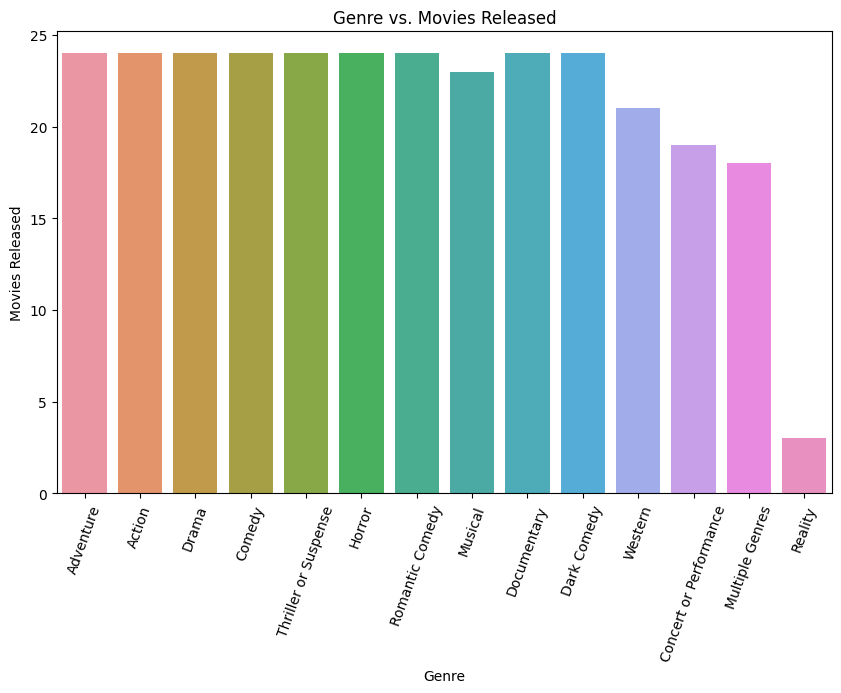

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Genre')
plt.xlabel('Genre')
plt.ylabel('Movies Released')
plt.title('Genre vs. Movies Released')
plt.xticks(rotation=70)
plt.show()

**Let's check for the number of movies released per year**

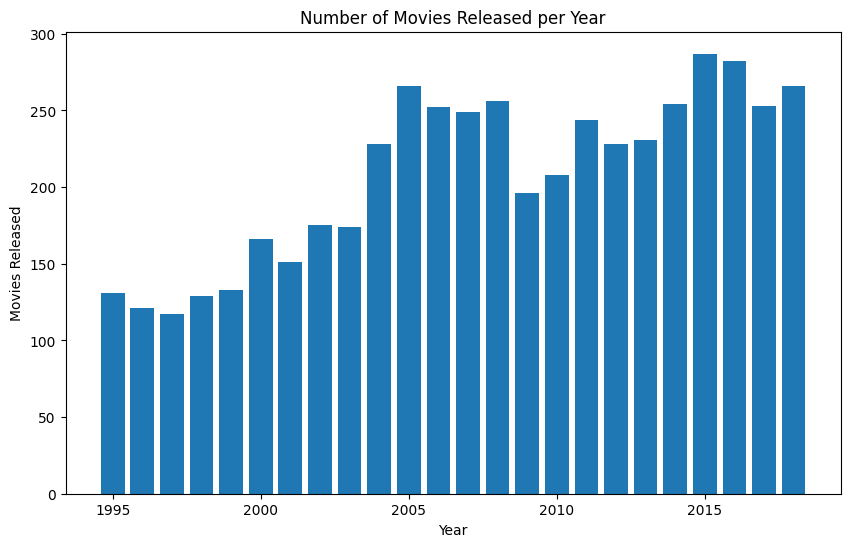

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['Movies Released'])
plt.xlabel('Year')
plt.ylabel('Movies Released')
plt.title('Number of Movies Released per Year')
plt.show()


**Gross revenue of the movies per year**

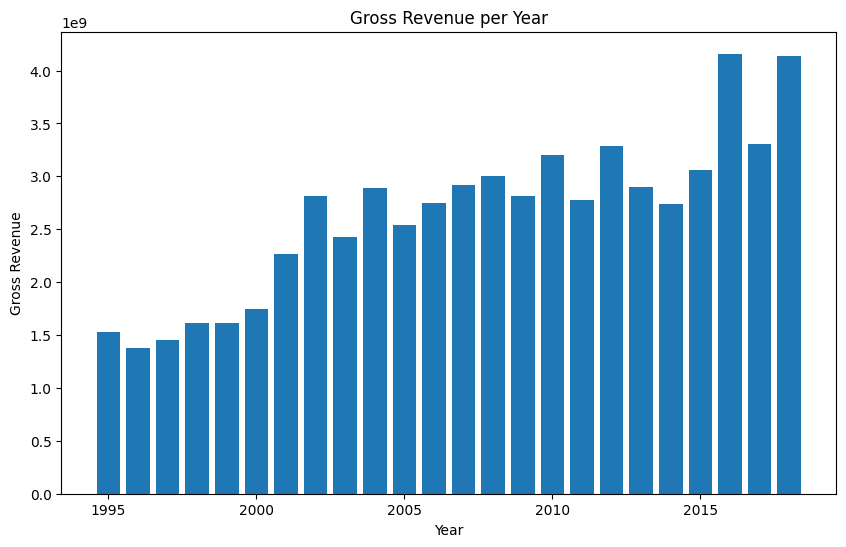

In [65]:
plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['Gross'])
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.title('Gross Revenue per Year')
plt.show()


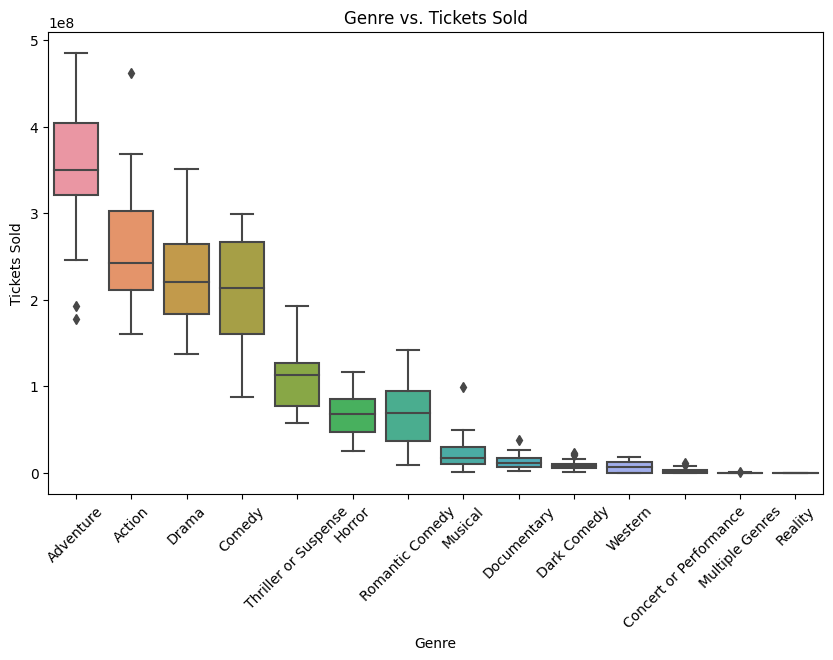

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Genre', y='Tickets Sold')
plt.xlabel('Genre')
plt.ylabel('Tickets Sold')
plt.title('Genre vs. Tickets Sold')
plt.xticks(rotation=45)
plt.show()

**Genre Distribution**

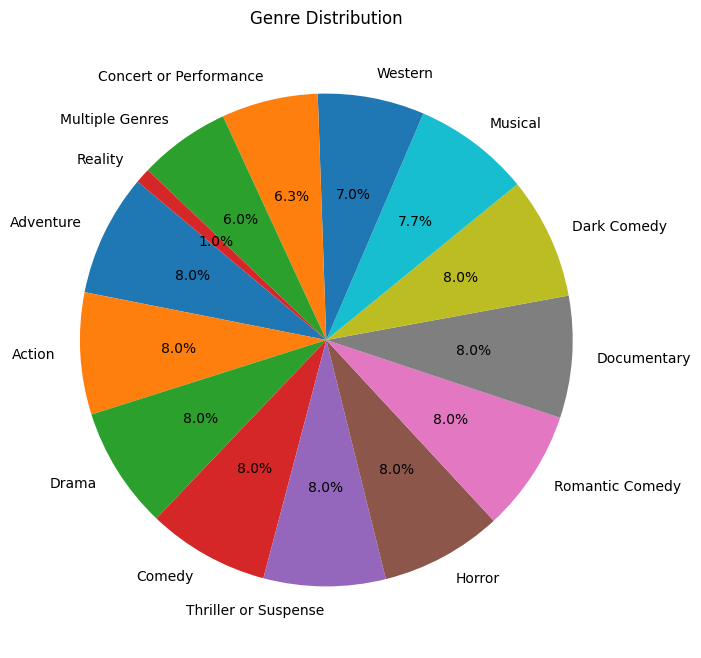

In [67]:
plt.figure(figsize=(8, 8))
genre_counts = df['Genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution')
plt.show()

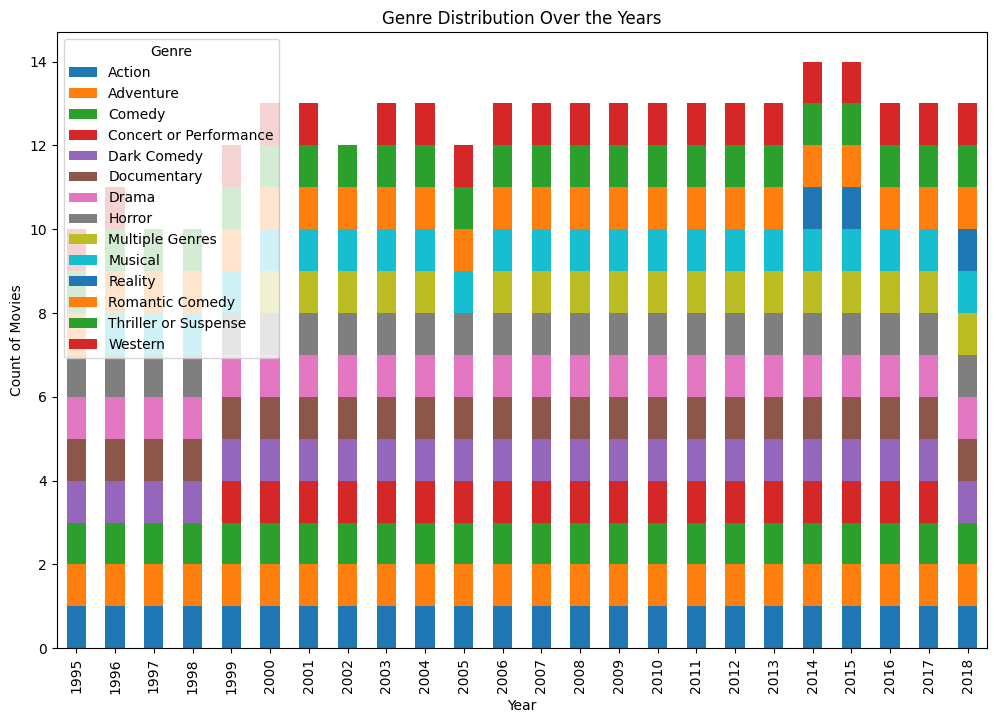

In [68]:
genre_year = df.groupby(['Year', 'Genre']).size().unstack()
genre_year.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.title('Genre Distribution Over the Years')
plt.legend(title='Genre')
plt.show()


**Yearly Trends in Gross Revenue (Overall)**

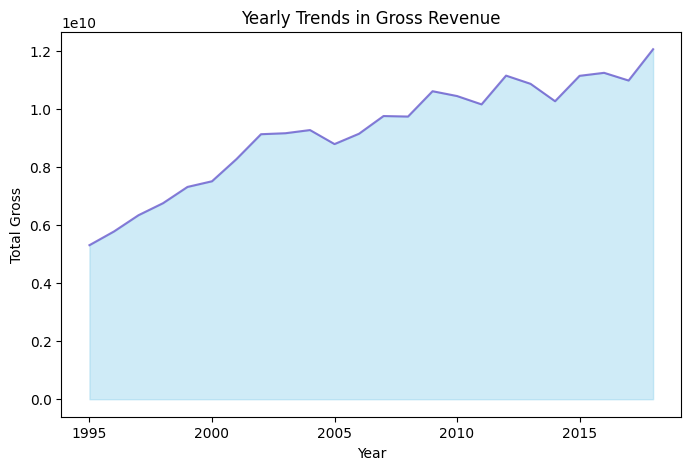

In [69]:
yearly_gross = df.groupby('Year')['Gross'].sum()
plt.figure(figsize=(8, 5))
plt.fill_between(yearly_gross.index, yearly_gross.values, color='skyblue', alpha=0.4)
plt.plot(yearly_gross.index, yearly_gross.values, color='Slateblue', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.title('Yearly Trends in Gross Revenue')
plt.show()

**Top 10 Movies that have more ticket sold**

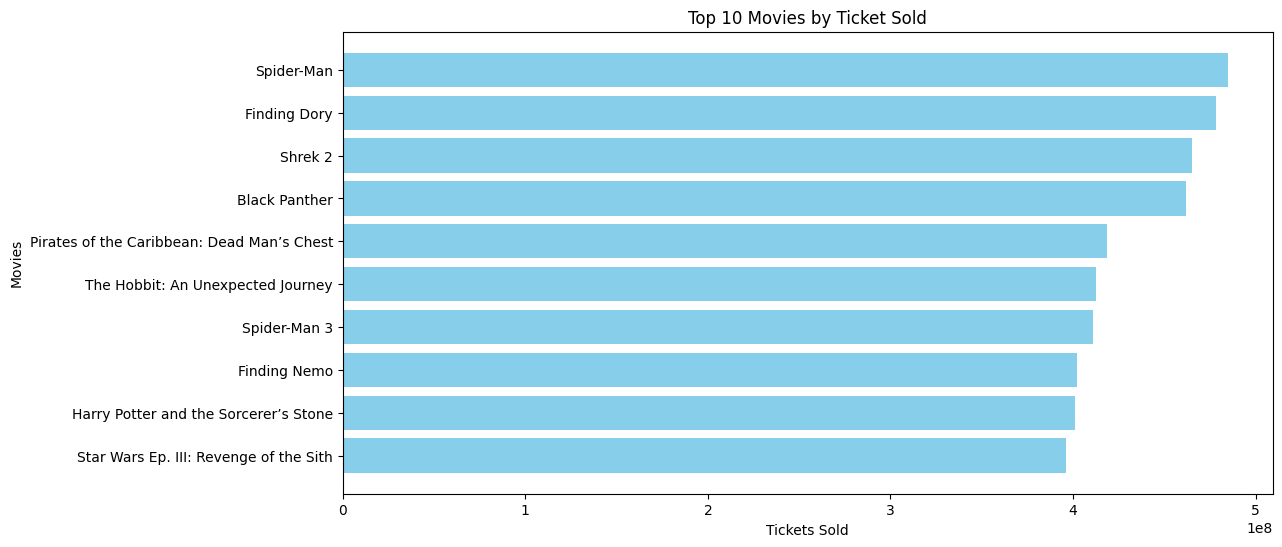

In [72]:
top_ticket_sold = df.nlargest(10, 'Tickets Sold')

plt.figure(figsize=(12, 6))
plt.barh(top_ticket_sold['Top Movie'], top_ticket_sold['Tickets Sold'], color='skyblue')
plt.xlabel('Tickets Sold')
plt.ylabel('Movies')
plt.title('Top 10 Movies by Ticket Sold')
plt.gca().invert_yaxis() 
plt.show()


**Top 5 movies with highest Gross Revenue**

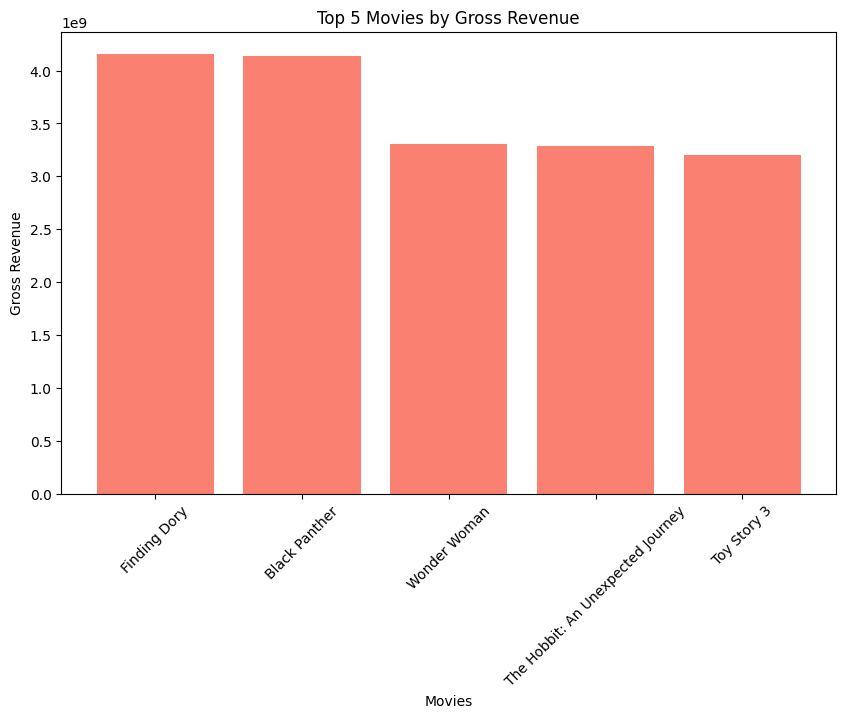

In [73]:
top_gross_movies = df.nlargest(5, 'Gross')

plt.figure(figsize=(10, 6))
plt.bar(top_gross_movies['Top Movie'], top_gross_movies['Gross'], color='salmon')
plt.xlabel('Movies')
plt.ylabel('Gross Revenue')
plt.title('Top 5 Movies by Gross Revenue')
plt.xticks(rotation=45)
plt.show()


**Number of Movies Released per Genre over Years**

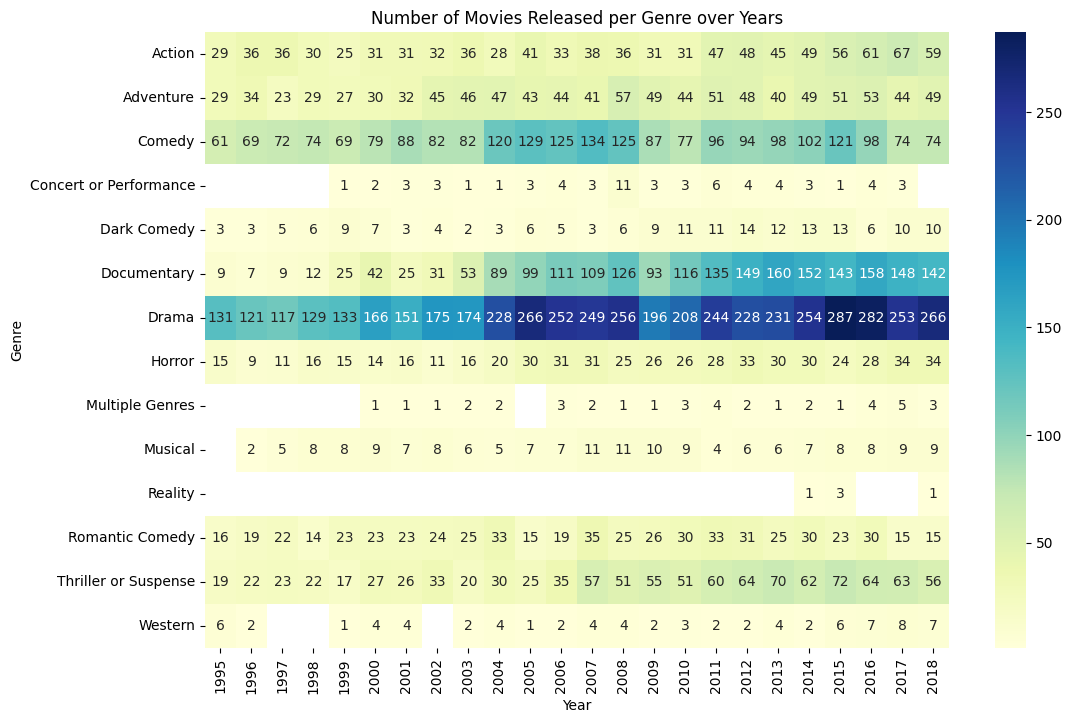

In [70]:
pivot_genre_year = df.pivot_table(index='Genre', columns='Year', values='Movies Released', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_genre_year, cmap='YlGnBu', annot=True, fmt='g')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.title('Number of Movies Released per Genre over Years')
plt.show()


**Correlation Heatmap**

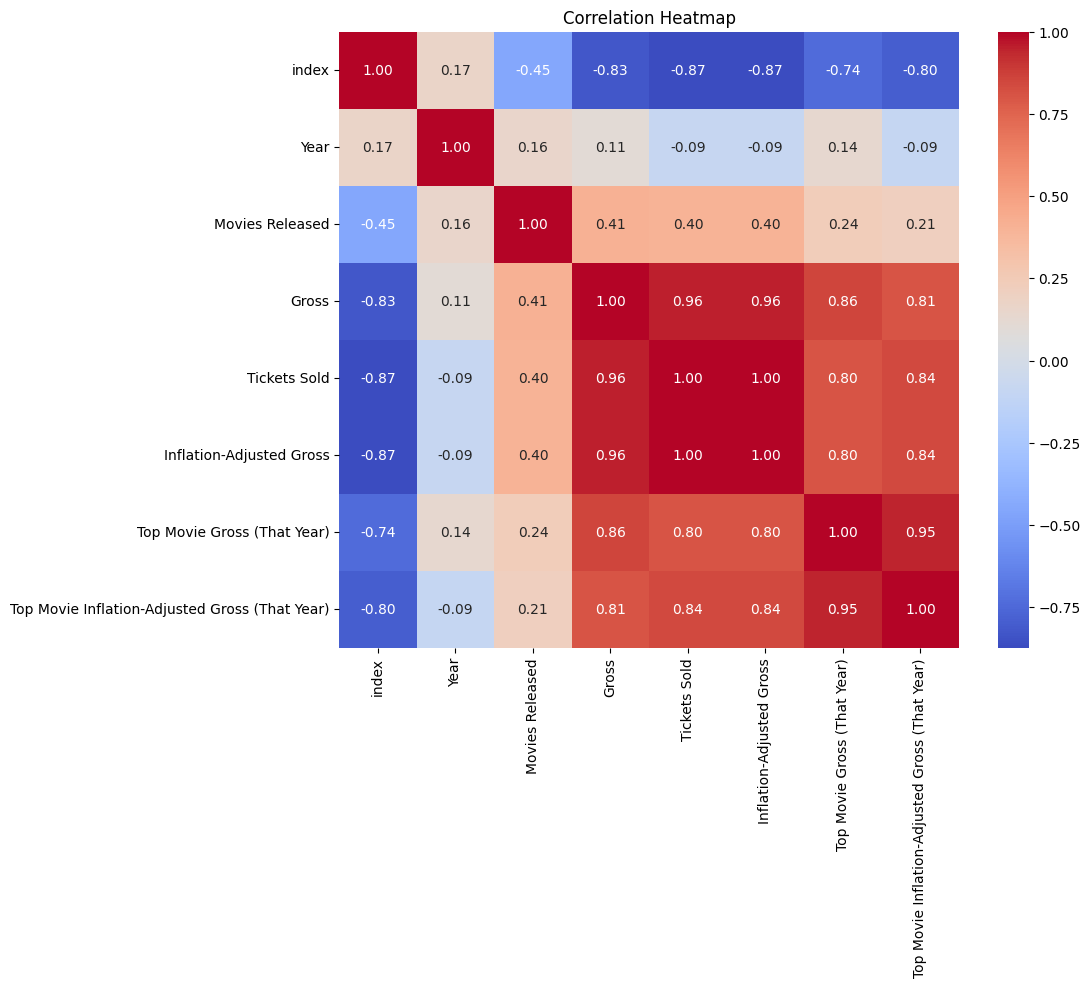

In [71]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
